**Importing Libraries**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Read dataset**

In [2]:
file = "C:\\Users\\dell\\Downloads\\mcdonalds.csv"
df=pd.read_csv(file)

In [23]:
#head
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,0,0,0,0,0,0,0,0,0,0,0,61,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,51,0,0
2,0,0,1,0,1,0,1,1,0,1,0,2,62,0,0
3,1,0,0,0,1,0,0,1,1,0,1,3,69,1,0
4,0,0,0,0,1,0,0,0,1,1,0,1,49,2,1


In [4]:
#tail
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


**Information of the file**

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


**Finding missing values**

In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

**Finding duplicate values**

In [7]:
df.duplicated().sum()

np.int64(22)

**Finding garbage values**

In [8]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***")

yummy
Yes    803
No     650
Name: count, dtype: int64
***
convenient
Yes    1319
No      134
Name: count, dtype: int64
***
spicy
No     1317
Yes     136
Name: count, dtype: int64
***
fattening
Yes    1260
No      193
Name: count, dtype: int64
***
greasy
Yes    765
No     688
Name: count, dtype: int64
***
fast
Yes    1308
No      145
Name: count, dtype: int64
***
cheap
Yes    870
No     583
Name: count, dtype: int64
***
tasty
Yes    936
No     517
Name: count, dtype: int64
***
expensive
No     933
Yes    520
Name: count, dtype: int64
***
healthy
No     1164
Yes     289
Name: count, dtype: int64
***
disgusting
No     1100
Yes     353
Name: count, dtype: int64
***
Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64
***
VisitFrequency
Once a month             439
Every three months       342
On

**Exploratory data analysis**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [10]:
df.describe(include="object")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,439,788


**Encoding to numerical binary data using pandas**

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col], uniques = pd.factorize(df[col])
    print(f"Column: {col}")
    print(f"Mapping: {dict(enumerate(uniques))}\n")
df.to_csv('mcdonalds_encoded.csv', index=False)
print("Encoded dataset saved as 'mcdonalds_encoded.csv'.")


Column: yummy
Mapping: {0: 'No', 1: 'Yes'}

Column: convenient
Mapping: {0: 'Yes', 1: 'No'}

Column: spicy
Mapping: {0: 'No', 1: 'Yes'}

Column: fattening
Mapping: {0: 'Yes', 1: 'No'}

Column: greasy
Mapping: {0: 'No', 1: 'Yes'}

Column: fast
Mapping: {0: 'Yes', 1: 'No'}

Column: cheap
Mapping: {0: 'Yes', 1: 'No'}

Column: tasty
Mapping: {0: 'No', 1: 'Yes'}

Column: expensive
Mapping: {0: 'Yes', 1: 'No'}

Column: healthy
Mapping: {0: 'No', 1: 'Yes'}

Column: disgusting
Mapping: {0: 'No', 1: 'Yes'}

Column: Like
Mapping: {0: '-3', 1: '+2', 2: '+1', 3: '+4', 4: 'I love it!+5', 5: 'I hate it!-5', 6: '-2', 7: '+3', 8: '0', 9: '-4', 10: '-1'}

Column: VisitFrequency
Mapping: {0: 'Every three months', 1: 'Once a week', 2: 'Once a month', 3: 'Once a year', 4: 'More than once a week', 5: 'Never'}

Column: Gender
Mapping: {0: 'Female', 1: 'Male'}

Encoded dataset saved as 'mcdonalds_encoded.csv'.


In [12]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,0,0,0,0,0,0,0,0,0,0,0,61,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,51,0,0
2,0,0,1,0,1,0,1,1,0,1,0,2,62,0,0
3,1,0,0,0,1,0,0,1,1,0,1,3,69,1,0
4,0,0,0,0,1,0,0,0,1,1,0,1,49,2,1


**Boxplot**

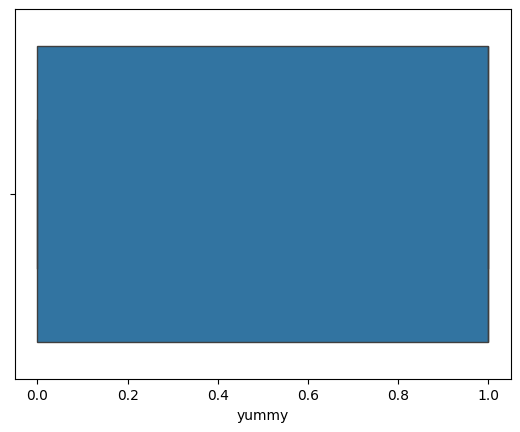

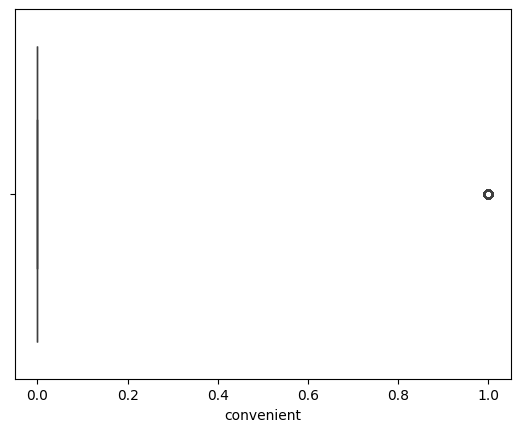

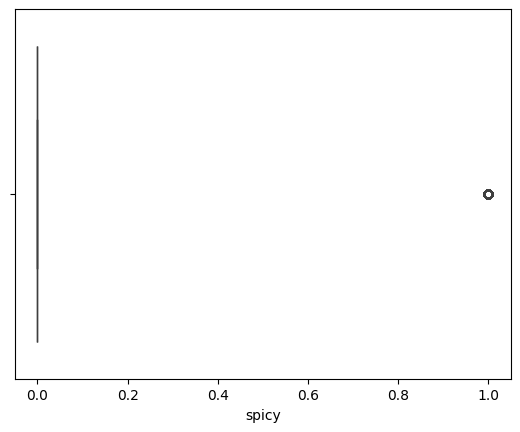

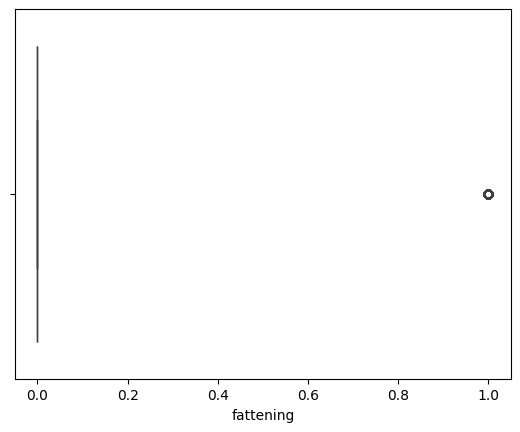

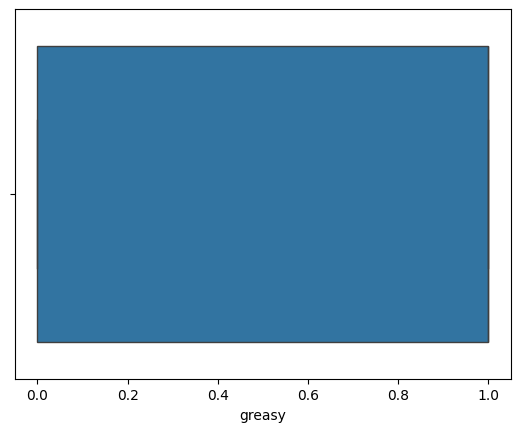

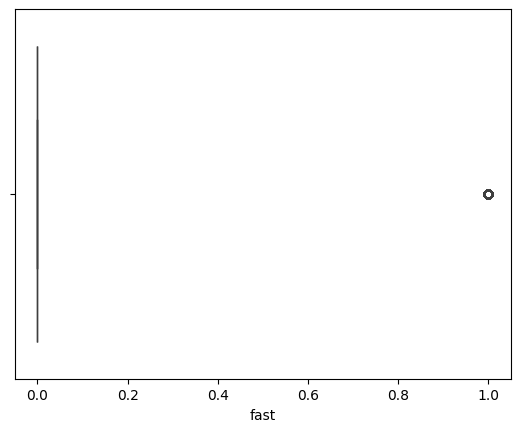

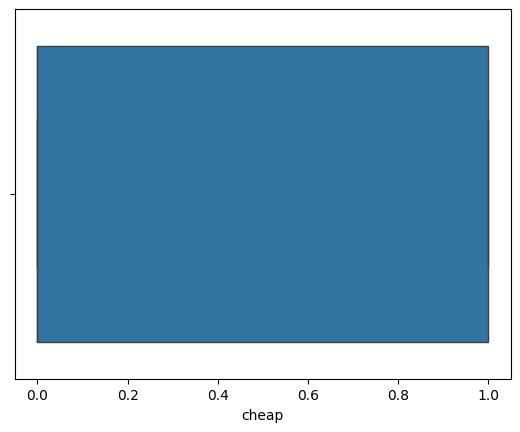

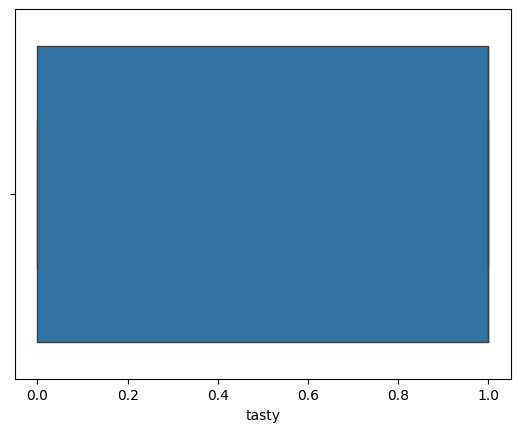

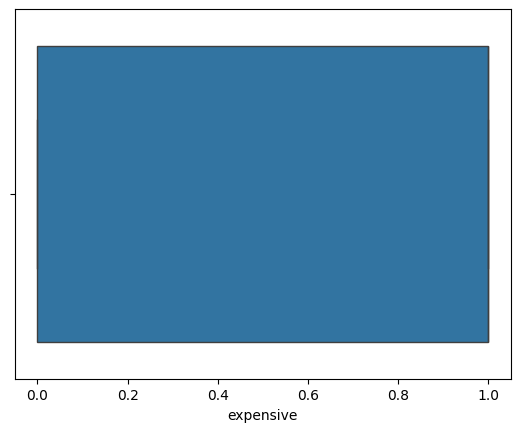

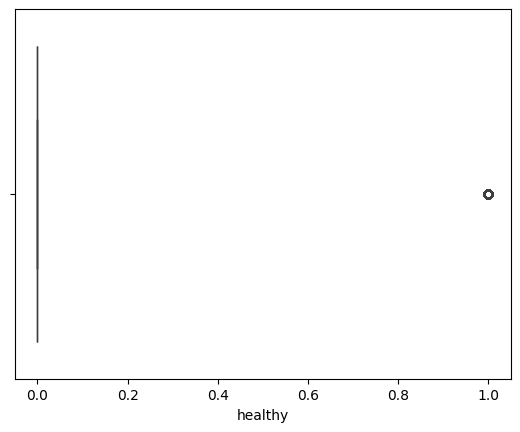

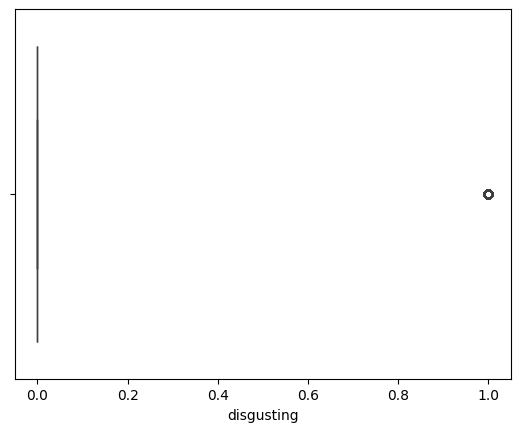

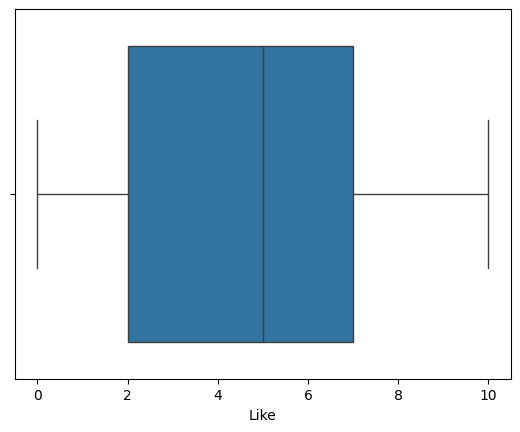

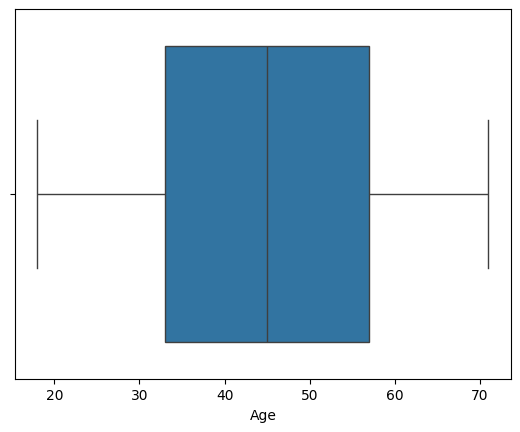

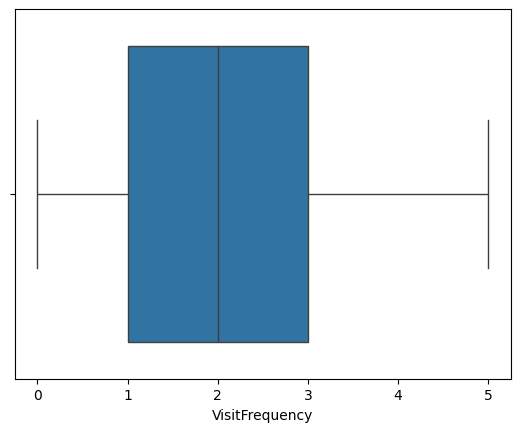

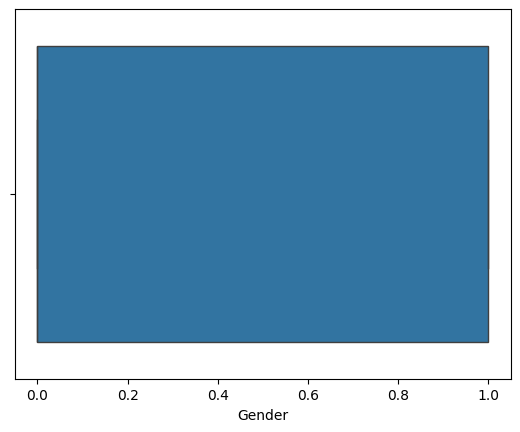

In [14]:
df=pd.read_csv("mcdonalds_encoded.csv")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

**Correlaion between data**

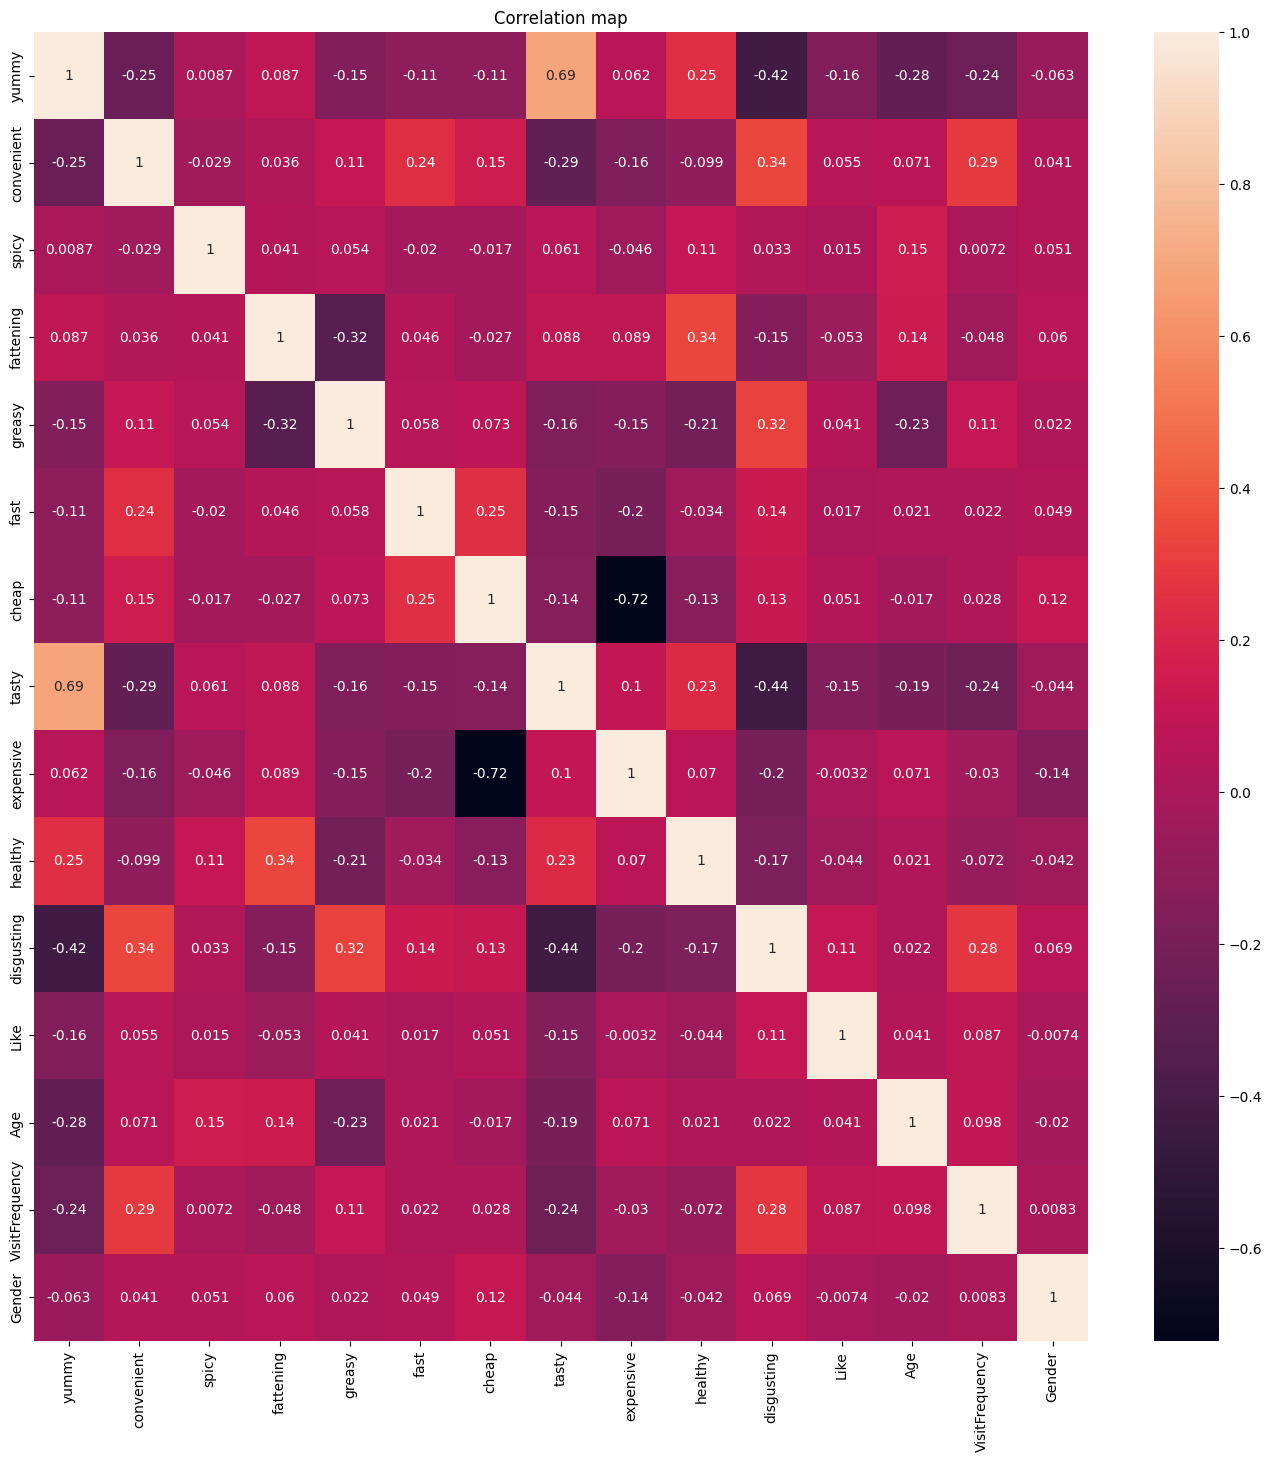

In [15]:
s = df.select_dtypes(include="number").corr()
plt.figure(figsize=(17,17))
sns.heatmap(s, annot = True)
plt.title("Correlation map")
plt.show()

**Principle Component Analysis**

In [16]:
numeric_data = df.select_dtypes(include=[np.number])

**Standarize the data**

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

**Apply PCA**

In [20]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

**Explained Variance**

In [21]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.19971404 0.11693508]


**Visualise PCA**

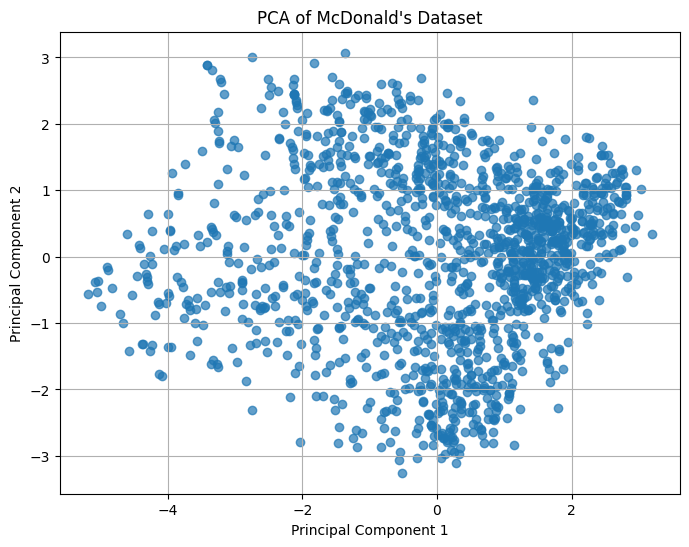

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA of McDonald\'s Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()